NB: you need to `export PYTHONPATH="../tools:../tools/tomocorr"` before starting the notebook server

## Setup imports

In [1]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as basemap
# Make the figures big
plt.rcParams['figure.figsize'] = (12, 8)

import pandas
import numpy as np

# Get access to taup
import obspy.taup

# Geodesic calculations
import geographiclib.geodesic as geod

# Our ISC parser
import read_ISC

# tomographic correction
import tomocorr2

## Example of running tomocorr

In [2]:
# Setup the tomography model - you can only do this once
# (Fortran limitation)
corrector = tomocorr2.TomographicCorrection('../tools/tomocorr/ak135.1D_vp', 
                                            '../tools/tomocorr/vdh3D_1999', 
                                            ellipsoid=geod.Geodesic(a=6371000.0, f=0))


In [3]:
slat = 0.0
slon = 90.0
elat = 0.0
elon = 0.0
edep = 100.0
dt = corrector.calculate(elat, elon, edep, slat, slon, ['P', 'PcP'])
print dt

[0.5965781211853027, -1.7996182441711426]


## Read in data
we need to throw out P triplications too

In [4]:
all_picks = read_ISC.read_picks('../data/ISC_Jan_2012_trim.dat', ('P', 'PcP'))
paired_picks = read_ISC.pair_picks(all_picks, 'PcP', 'P')
paired_picks_df = pandas.DataFrame.from_dict(paired_picks, orient='index')
# Remove Pdiff
paired_picks_df = paired_picks_df[(paired_picks_df.epicentral_distance < 80)]
# Remove P triplications
paired_picks_df = paired_picks_df[(paired_picks_df.epicentral_distance > 30)]
paired_picks_df

,eventid,P_datetime,station_lon,reporter,PcP_datetime,epicentral_distance,station_elev,event_lat,station,backazimuth,event_depth,event_lon,event_datetime,station_lat
600130102GTABJI,600130102,2012-01-01 00:38:39.200,99.8144,BJI,2012-01-01 00:40:10.900,47.42,1341.0,11.9775,GTA,313.2,27.5,143.7081,2012-01-01 00:30:07.200,39.4106
600130102GYABJI,600130102,2012-01-01 00:37:21.200,106.6640,BJI,2012-01-01 00:39:38.700,37.67,1162.0,11.9775,GYA,297.9,27.5,143.7081,2012-01-01 00:30:07.200,26.4586
600130102KLRIDC,600130102,2012-01-01 00:37:25.400,131.7500,IDC,2012-01-01 00:39:39.170,38.44,298.0,11.9775,KLR,347.4,27.5,143.7081,2012-01-01 00:30:07.200,49.2300
600130102KSHBJI,600130102,2012-01-01 00:40:50.000,75.9731,BJI,2012-01-01 00:41:23.300,65.33,1314.0,11.9775,KSH,308.0,27.5,143.7081,2012-01-01 00:30:07.200,39.5167
600130102PETKIDC,600130102,2012-01-01 00:38:00.270,157.6989,IDC,2012-01-01 00:39:51.750,42.53,400.0,11.9775,PETK,12.5,27.5,143.7081,2012-01-01 00:30:07.200,53.1082
600130102SONMIDC,600130102,2012-01-01 00:38:39.360,106.3950,IDC,2012-01-01 00:40:09.380,47.41,1415.8,11.9775,SONM,326.3,27.5,143.7081,2012-01-01 00:30:07.200,47.8347
600130102ZALVIDC,600130102,2012-01-01 00:40:26.100,84.8188,IDC,2012-01-01 00:41:05.750,62.28,229.4,11.9775,ZALV,325.1,27.5,143.7081,2012-01-01 00:30:07.200,53.9481
600130103AS01NEIC,600130103,2012-01-01 00:56:35.790,133.9510,NEIC,2012-01-01 00:59:19.090,33.03,605.0,-11.3505,AS01,243.9,37.0,166.2200,2012-01-01 00:50:04.840,-23.6647
600130103ASARIDC,600130103,2012-01-01 00:56:36.100,133.9040,IDC,2012-01-01 00:59:19.400,33.07,607.0,-11.3505,ASAR,243.9,37.0,166.2200,2012-01-01 00:50:04.840,-23.6664
600130103STKAIDC,600130103,2012-01-01 00:56:15.400,141.5952,IDC,2012-01-01 00:59:13.370,30.55,272.3,-11.3505,STKA,224.2,37.0,166.2200,2012-01-01 00:50:04.840,-31.8769


## Calculate tomographic corrections
This takes ~2 mins

In [5]:

paired_picks_df["P_tomo_corr"] = paired_picks_df.apply(
    lambda row: corrector.calculate(row['event_lat'],
                                    row['event_lon'],
                                    row['event_depth'],
                                    row['station_lat'],
                                    row['station_lon'], ['P'])[0], axis=1)

paired_picks_df["PcP_tomo_corr"] = paired_picks_df.apply(
    lambda row: corrector.calculate(row['event_lat'],
                                    row['event_lon'],
                                    row['event_depth'],
                                    row['station_lat'],
                                    row['station_lon'], ['PcP'])[0], axis=1)


## 1D model data and PcP-P differences for comparison

In [6]:
# PcP - P times...

paired_picks_df["PcP_ttime"] = paired_picks_df.PcP_datetime - paired_picks_df.event_datetime
paired_picks_df["P_ttime"] = paired_picks_df.P_datetime - paired_picks_df.event_datetime
paired_picks_df["PcP_P_dtime"] = paired_picks_df.PcP_ttime - paired_picks_df.P_ttime

In [7]:
# Create the Earth model
# iasp91 is built in and 
# distributed with the code
earth_model = obspy.taup.TauPyModel(model="iasp91")

def calc_P_PcP(epi, z):
    arrivals = earth_model.get_travel_times(z, epi, phase_list=['PcP','P'])
    # Use the last arrival as PcP - to avoid problems with
    # P triplications.
    PcP_P_time = arrivals[-1].time - arrivals[0].time
    return PcP_P_time

paired_picks_df["PcP_P_dtime_calc_secs"] = paired_picks_df.apply(
    lambda row: calc_P_PcP(row['epicentral_distance'], row['event_depth']), axis=1)

# For plotting timedeltas, we need the delay time in seconds (not as a timedelta64)
paired_picks_df["PcP_P_dtime_secs"] = paired_picks_df.PcP_P_dtime.values / np.timedelta64(1, 's')
# -ve is early (w.r.t. model)
paired_picks_df["PcP_P_resid"] = paired_picks_df.PcP_P_dtime_secs - paired_picks_df.PcP_P_dtime_calc_secs

In [8]:
# correction to PcP - P for tomographic correction
paired_picks_df["PcP_P_resid_tomo"] = paired_picks_df.PcP_P_dtime_secs - (
    paired_picks_df.PcP_P_dtime_calc_secs - paired_picks_df["P_tomo_corr"] - 
    paired_picks_df["PcP_tomo_corr"])

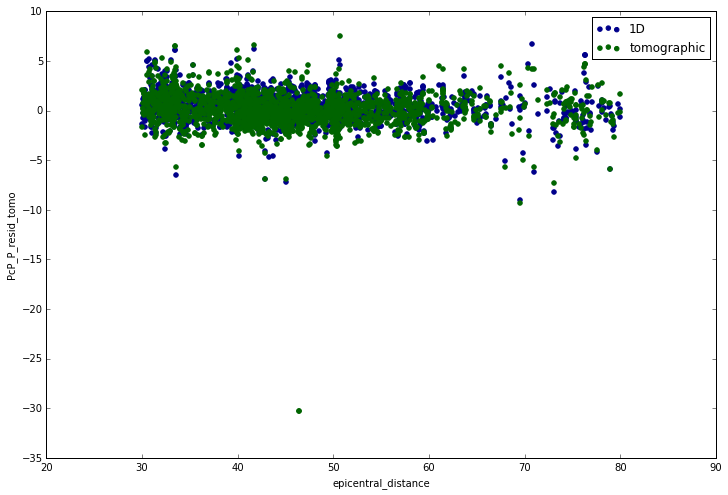

In [9]:
ax = paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_resid', 
                          color='DarkBlue', label='1D')
paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_resid_tomo', 
                          color='DarkGreen', label='tomographic', ax=ax)


In [18]:
# Remove massive tomo error
paired_picks_df = paired_picks_df[(paired_picks_df.PcP_P_resid_tomo > -20.0)]

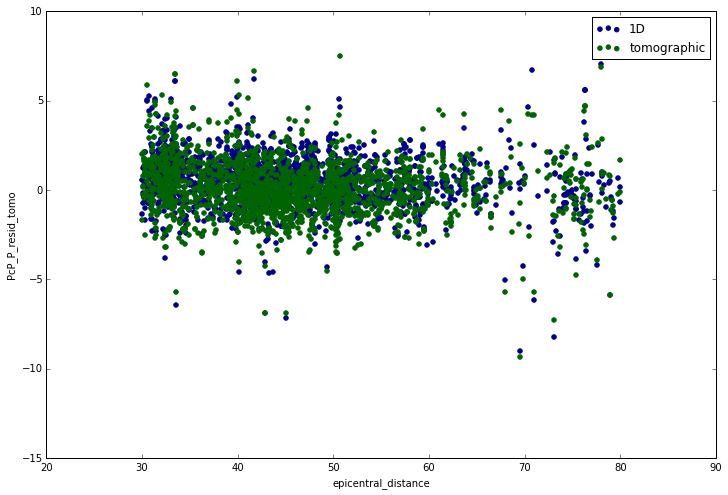

In [19]:
ax = paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_resid', 
                          color='DarkBlue', label='1D')
paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_resid_tomo', 
                          color='DarkGreen', label='tomographic', ax=ax)


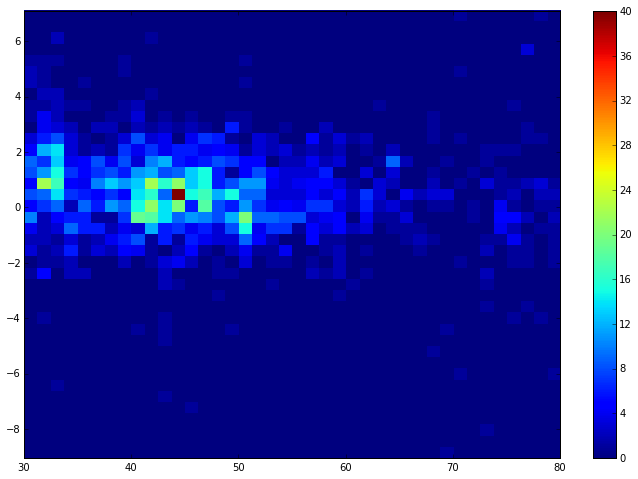

In [20]:
# Histogram 1D
plt.hist2d(paired_picks_df.epicentral_distance.values, 
       paired_picks_df.PcP_P_resid.values, 
       bins=40)
plt.colorbar()
plt.show()

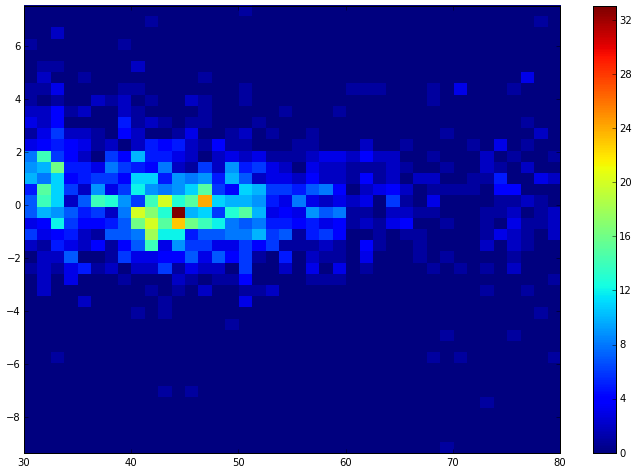

In [21]:
# Histogram 1D
plt.hist2d(paired_picks_df.epicentral_distance.values, 
       paired_picks_df.PcP_P_resid_tomo.values, 
       bins=40)
plt.colorbar()
plt.show()

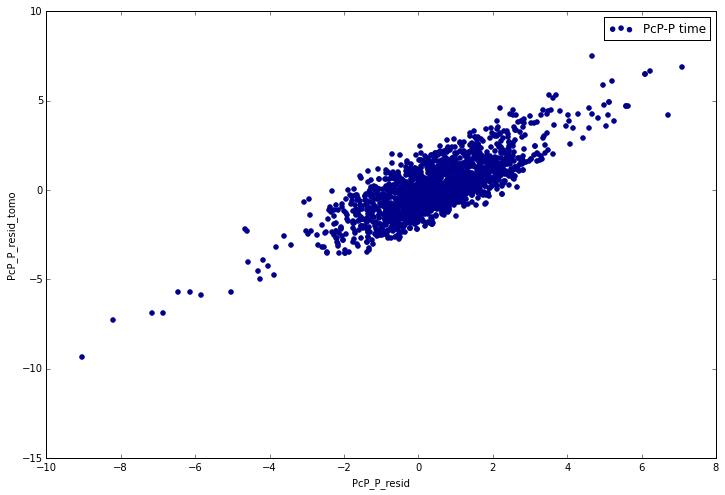

In [22]:
ax = paired_picks_df.plot(kind='scatter', x='PcP_P_resid', y='PcP_P_resid_tomo', 
                          color='DarkBlue', label='PcP-P time')

In [23]:
paired_picks_df

,eventid,P_datetime,station_lon,reporter,PcP_datetime,epicentral_distance,station_elev,event_lat,station,backazimuth,...,station_lat,P_tomo_corr,PcP_tomo_corr,PcP_ttime,P_ttime,PcP_P_dtime,PcP_P_dtime_calc_secs,PcP_P_dtime_secs,PcP_P_resid,PcP_P_resid_tomo
600130102GTABJI,600130102,2012-01-01 00:38:39.200,99.8144,BJI,2012-01-01 00:40:10.900,47.42,1341.0,11.9775,GTA,313.2,...,39.4106,-0.028361,-0.650772,00:10:03.700000,00:08:32,00:01:31.700000,90.066708,91.70,1.633292,0.954158
600130102GYABJI,600130102,2012-01-01 00:37:21.200,106.6640,BJI,2012-01-01 00:39:38.700,37.67,1162.0,11.9775,GYA,297.9,...,26.4586,0.744636,0.072260,00:09:31.500000,00:07:14,00:02:17.500000,136.775610,137.50,0.724390,1.541286
600130102KLRIDC,600130102,2012-01-01 00:37:25.400,131.7500,IDC,2012-01-01 00:39:39.170,38.44,298.0,11.9775,KLR,347.4,...,49.2300,-0.297819,-0.263379,00:09:31.970000,00:07:18.200000,00:02:13.770000,132.703761,133.77,1.066239,0.505041
600130102KSHBJI,600130102,2012-01-01 00:40:50.000,75.9731,BJI,2012-01-01 00:41:23.300,65.33,1314.0,11.9775,KSH,308.0,...,39.5167,0.823222,0.043098,00:11:16.100000,00:10:42.800000,00:00:33.300000,31.853179,33.30,1.446821,2.313140
600130102PETKIDC,600130102,2012-01-01 00:38:00.270,157.6989,IDC,2012-01-01 00:39:51.750,42.53,400.0,11.9775,PETK,12.5,...,53.1082,-0.340399,-0.634233,00:09:44.550000,00:07:53.070000,00:01:51.480000,112.096608,111.48,-0.616608,-1.591240
600130102SONMIDC,600130102,2012-01-01 00:38:39.360,106.3950,IDC,2012-01-01 00:40:09.380,47.41,1415.8,11.9775,SONM,326.3,...,47.8347,-0.076807,-0.707003,00:10:02.180000,00:08:32.160000,00:01:30.020000,90.109276,90.02,-0.089276,-0.873086
600130102ZALVIDC,600130102,2012-01-01 00:40:26.100,84.8188,IDC,2012-01-01 00:41:05.750,62.28,229.4,11.9775,ZALV,325.1,...,53.9481,-0.479294,-1.061472,00:10:58.550000,00:10:18.900000,00:00:39.650000,39.462504,39.65,0.187496,-1.353270
600130103AS01NEIC,600130103,2012-01-01 00:56:35.790,133.9510,NEIC,2012-01-01 00:59:19.090,33.03,605.0,-11.3505,AS01,243.9,...,-23.6647,-0.910793,0.067090,00:09:14.250000,00:06:30.950000,00:02:43.300000,162.790878,163.30,0.509122,-0.334581
600130103ASARIDC,600130103,2012-01-01 00:56:36.100,133.9040,IDC,2012-01-01 00:59:19.400,33.07,607.0,-11.3505,ASAR,243.9,...,-23.6664,-0.915005,0.064931,00:09:14.560000,00:06:31.260000,00:02:43.300000,162.554581,163.30,0.745419,-0.104656
600130103STKAIDC,600130103,2012-01-01 00:56:15.400,141.5952,IDC,2012-01-01 00:59:13.370,30.55,272.3,-11.3505,STKA,224.2,...,-31.8769,0.228419,0.176501,00:09:08.530000,00:06:10.560000,00:02:57.970000,177.843084,177.97,0.126916,0.531837


In [24]:
paired_picks_df.mean(axis=0)

station_lon               68.703918
epicentral_distance       46.037921
station_elev             700.329844
event_lat                 14.642783
backazimuth              239.527529
event_depth              111.913085
event_lon                 70.914980
station_lat               27.941509
P_tomo_corr               -0.162667
PcP_tomo_corr             -0.218729
PcP_P_dtime_calc_secs    100.930710
PcP_P_dtime_secs         101.397911
PcP_P_resid                0.467201
PcP_P_resid_tomo           0.085806
dtype: float64

In [25]:
paired_picks_df.std(axis=0)

station_lon               82.021002
epicentral_distance       10.889163
station_elev             549.796631
event_lat                 25.875370
backazimuth              111.032067
event_depth              152.571888
event_lon                114.166463
station_lat               31.930297
P_tomo_corr                0.647368
PcP_tomo_corr              0.436391
PcP_P_dtime_calc_secs     42.906374
PcP_P_dtime_secs          43.182202
PcP_P_resid                1.420334
PcP_P_resid_tomo           1.557643
dtype: float64